# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

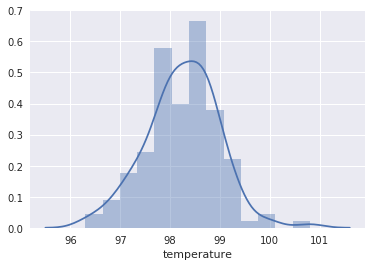

In [2]:
sns.set(color_codes=True)
sns.distplot(df.temperature)

# 1.

The sample of the population seems to have an approximate normal distribution with respect to mean body-temperature, with a large sample-population density in the range 97.2F and 99.4F. 

Carl Wunderlich's estimate of mean body temperature lies within this range, so at first glance it doesn't seem to be an outlandish value.

# 2.

The sample size is not large compared to the global population. However it may not be too small for the purpose of this exercise, since each person's body temperature is and independent sample. 

Intuitively, there may be difference in variation of body temperature depending on gender. 
Hence, we divide the data based on 'Male' and 'Female' samples.

In [3]:
F = pd.DataFrame(df[:65])
M = pd.DataFrame(df[65:])

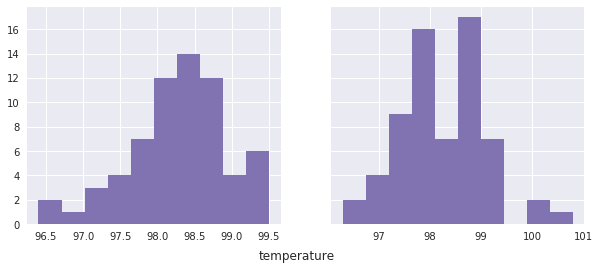

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (10, 4))
ax1.hist(F.temperature, color = 'm')
ax2.hist(M.temperature, color = 'm')

fig.text(0.5, 0.001, 'temperature', ha='center')

While the distribution of Female body temperature is approximately normal, the Male distribution seems suspect because of it's two peaks and some missing frequency between 99.4F and 99.8F. 

This may not be the most trustworthy sample set.

In [5]:
Male_mean = M.temperature.mean()
Male_dev = M.temperature.std()
print(Male_mean, Male_dev)

98.2276923076923 0.8146141134587311


In [6]:
Female_mean = F.temperature.mean()
Female_dev = F.temperature.std()
print(Female_mean, Female_dev)

98.27076923076922 0.64728352484708


In [7]:
fit2 = stats.norm.pdf( F.temperature, Female_mean, Female_dev)
fit1 = stats.norm.pdf( M.temperature, Male_mean, Male_dev)

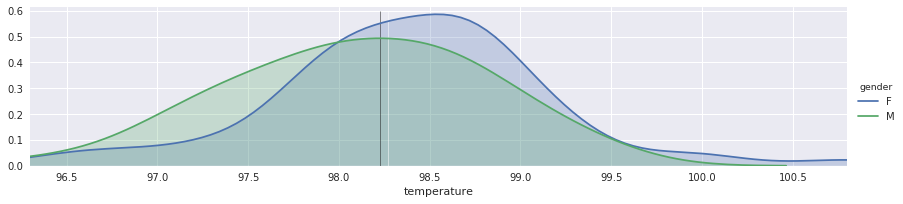

In [8]:
#use FacetGrid to plot multiple kdeplots of Age and Sex on one plot 
fig = sns.FacetGrid(df, hue='gender', aspect=4)
fig.map(sns.kdeplot,'temperature', shade=True)
fig.set(xlim=(df['temperature'].min(), df['temperature'].max()))
fig.add_legend()
plt.vlines([Male_mean, Female_mean], 0, 0.6, linewidth=0.5, color=['0.1', '1'])


In [9]:
Sample_mean = np.mean(df.temperature)
Sample_dev = np.std(df.temperature)

print("Sample mean and dev :", [Sample_mean, Sample_dev])

Z = (Male_mean+Female_mean)/2
print("Mean between male and female avg. temperatures: ", Z)

Sample mean and dev : [98.24923076923078, 0.7303577789050377]
Mean between male and female avg. temperatures:  98.24923076923076


# 3.

   1. The population mean is 98.25 F, which is 0.35 F less than Carl Wunderlich's estimate. 
   1. Since we are not measuring correlation between any two variables, a one sample test is sufficient for this data.
   1. Since the sample size (for both males and females) is > 30, we will use the z-score test.

In [25]:
def normal_variables(mu, std):
    xs = np.linspace(mu - 2*std, mu + 2*std, 10000)
    m = stats.norm(mu, std)
    ys = m.pdf(xs)
    return xs, ys

In [26]:
xs, ys = normal_variables(Sample_mean, Sample_dev)

In [27]:
cs = np.cumsum( ys*(xs[1]-xs[0]))                   # to calculate cumulative probabilities                                                  # returns an array of cumulative sums of the distribution
print(cs)                                                # returns array of cumulative sums

[  2.15985465e-05   4.32143787e-05   6.48475070e-05 ...,   9.54478117e-01
   9.54499733e-01   9.54521332e-01]


In [28]:
def find_threshold(x):
    i = 0
    while cs[i] < x:
        i += 1
    return i

In [29]:
lower = xs[find_threshold(0.25)]              # lower limit of 50% confidence interval
upper = xs[find_threshold(0.75)]            # upper limit of 50% confidence interval
margin_of_error = [lower, upper]
margin_of_error

[97.807612294257297, 98.795446937912828]

(98, 98.4)

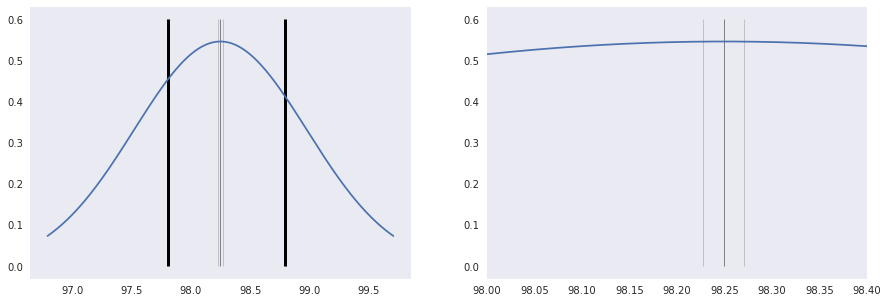

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows =1, ncols = 2, figsize = (15, 5))
for item in (ax1, ax2) :
    if item == ax1:
            plt.xlim([97.5, 99])
            item.vlines([lower, upper], 0, 0.6, linewidth=3, color=['0', '0'])
    item.grid('off')
    item.plot(xs, ys)
    item.vlines([Male_mean, Female_mean, Sample_mean], 0, 0.6, linewidth=0.5, color=['0.6', '0.6', '0.1'])
plt.xlim([98, 98.4])


# 4.

   - The 50% confidence interval for the sample average of body temperature is (97.807612294257297, 98.795446937912828), as depicted by the strong black lines in the first plot. The second plot shows  the male, population and female sample means respectively.

   - If a person's body temperature falls outside this range, i.e. below 97.8F or above 98.8F, then his/her temperature can be considered to be abnormal.
   
   - Carl Wunderlich's estimate lies within this confidence interval, so we can say that it is a reasonable estimate of average body temperature.

In [23]:
dev = np.sqrt(Female_dev**2/sum(df.gender == 'F') + Male_dev**2/sum(df.gender == 'M'))
diff = Male_mean - Female_mean
z = xs[find_threshold(diff)]
five_percent = xs[find_threshold(0.05)]
dev, z, five_percent, diff

(0.12905408021950243,
 -0.25810816043900486,
 -0.18784409276073991,
 -0.043076923076924345)

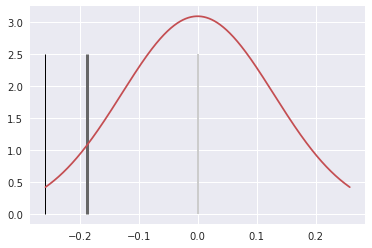

In [24]:
xs, ys  = normal_variables(0, dev)
cs = np.cumsum( ys*(xs[1]-xs[0]))                   # to calculate cumulative probabilities

plt.plot(xs,ys, color = 'r', )
plt.vlines([z, five_percent, 0], 0, 2.5, linewidth = [1,3,2], color = ['0', '0.4', '0.8'])

# 5.

   - Above is a plot for the null hypothesis that there is no significant difference between male and female mean body temperatures. It has mean 0 and standasr deviation 0.15. 

   - The thick grey line shows is the 5% probability mark for the null hypotheses and just below it is the probability of the male and femal body temperature difference as seen in the data. We can reject the null hypothesis.
   
   - In conclusion, a difference of 0.043F in body temperature of males and females is significant.

# Inference

The data sample reinforces trust in Carl Wunderlich's estimate of the average human body temperature from 120 years ago. Also, the 0.043F differencce in male and female average body temperatures significant.